In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=13)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing the dataset containing Orders and cleaning

In [10]:
Orders= pd.read_excel('Order_List.xlsx')
Orders.head()

,Order_ID,Order_Date,Origin_Port,Carrier,TPT,Service_Level,Ship_ahead_day_count,Ship_Late_Day_count,Customer,Product_ID,Plant_Code,Destination_Port,Unit_quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


## Converting Order_ID and Product_ID into integer datatype before converting to string datatype

In [12]:
Orders['Order_ID']=Orders['Order_ID'].astype(int)
Orders['Product_ID']=Orders['Product_ID'].astype(int)

## Converting the Order ID and Product ID into String Datatype

In [13]:
#Converting IDs to string data type
to_convert= ['Order_ID','Product_ID']
for col in to_convert:
    Orders[col]=Orders[col].astype(str)
Orders.dtypes

Order_ID                        object
Order_Date              datetime64[ns]
Origin_Port                     object
Carrier                         object
TPT                              int64
Service_Level                   object
Ship_ahead_day_count             int64
Ship_Late_Day_count              int64
Customer                        object
Product_ID                      object
Plant_Code                      object
Destination_Port                object
Unit_quantity                    int64
Weight                         float64
dtype: object

## Checking for Nulls and Duplicates and removing unnecessary columns

In [14]:
#Checking for Nulls
Orders.isna().sum()

Order_ID                0
Order_Date              0
Origin_Port             0
Carrier                 0
TPT                     0
Service_Level           0
Ship_ahead_day_count    0
Ship_Late_Day_count     0
Customer                0
Product_ID              0
Plant_Code              0
Destination_Port        0
Unit_quantity           0
Weight                  0
dtype: int64

In [15]:
#removing the Order date column
Orders=Orders.drop('Order_Date',axis=1)
#Checking for Duplicates
Orders.duplicated(subset=['Order_ID'])

0       False
1       False
2       False
3       False
4       False
        ...  
9210    False
9211    False
9212    False
9213    False
9214    False
Length: 9215, dtype: bool

## Adding additional columns called Total Weight and Route

In [16]:
Orders['Total_Weight']= Orders['Weight']*Orders['Unit_quantity']
Orders['Route']= Orders['Origin_Port']+Orders['Destination_Port']
Orders.head()

,Order_ID,Origin_Port,Carrier,TPT,Service_Level,Ship_ahead_day_count,Ship_Late_Day_count,Customer,Product_ID,Plant_Code,Destination_Port,Unit_quantity,Weight,Total_Weight,Route
0,1447296446,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30,11554.40,PORT09PORT09
1,1447158014,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94,280352.72,PORT09PORT09
2,1447138898,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20,142657.20,PORT09PORT09
3,1447363527,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16,13687.52,PORT09PORT09
4,1447363980,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34,113211.42,PORT09PORT09


# 1. Can the plants handle the order demand?

## 1.1 Calculating the total demand per plant from the Orders List

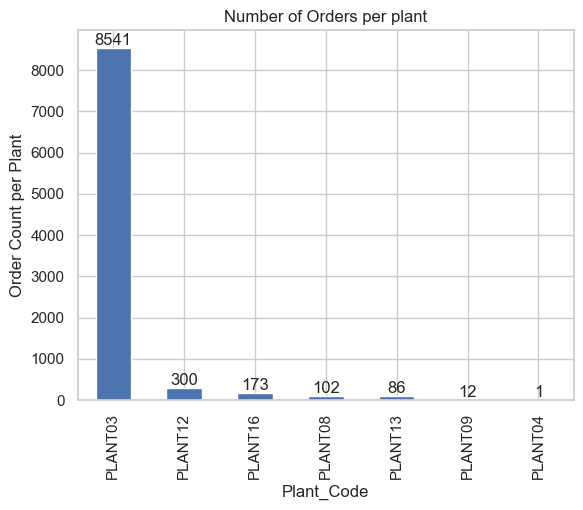

In [8]:
#Finding the Total Order demand per plant
result=Orders.groupby('Plant_Code')['Order_ID'].agg('count').sort_values(ascending=False)
result.df= pd.DataFrame(result)
result.df.rename(columns={'Order_ID':'Order_Count_Per_Plant'},inplace=True)
result.df
#Plotting the Demand
result.plot(kind='bar')
plt.xlabel('Plant_Code')
plt.ylabel('Order Count per Plant')
plt.title('Number of Orders per plant')
for index, value in enumerate(result):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

In [9]:
#Importing the Capacities Table
Capacity= pd.read_excel('Wh_Capcities.xlsx')
Capacity

,Plant_ID,Rated_Daily_Capacity
0,PLANT15,11
1,PLANT17,8
2,PLANT18,111
3,PLANT05,385
4,PLANT02,138
5,PLANT01,1070
6,PLANT06,49
7,PLANT10,118
8,PLANT07,265
9,PLANT14,549


## 1.2 Finding the rated capacities of the plants mentioned in the Orders Table

In [10]:
plants= ['PLANT03','PLANT12','PLANT16','PLANT08','PLANT13','PLANT09','PLANT04']
plant_new = Capacity[Capacity['Plant_ID'].isin(plants)].sort_values(by='Rated_Daily_Capacity ', ascending=False)
plant_new

,Plant_ID,Rated_Daily_Capacity
14,PLANT03,1013
18,PLANT04,554
15,PLANT13,490
10,PLANT16,457
11,PLANT12,209
17,PLANT08,14
13,PLANT09,11


## 1.3 Comparing demand with capacity

In [11]:
#Merging 2 tables
comparison = pd.merge(result.df, plant_new, how='outer', left_index=True, right_on='Plant_ID')
comparison.columns

Index(['Order_Count_Per_Plant', 'Plant_ID', 'Rated_Daily_Capacity '], dtype='object')

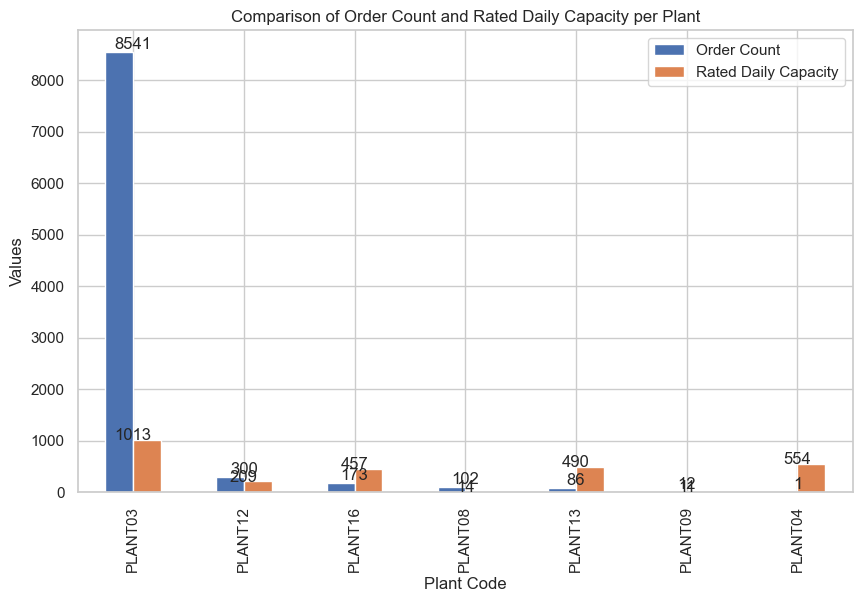

In [12]:
# Comparing Demand and Rated Capacities of each plant
comparison.plot(x='Plant_ID', y=['Order_Count_Per_Plant', 'Rated_Daily_Capacity '], kind='bar', figsize=(10, 6))
plt.xlabel('Plant Code')
plt.ylabel('Values')
plt.title('Comparison of Order Count and Rated Daily Capacity per Plant')
plt.legend(["Order Count", "Rated Daily Capacity"])
for index, value in enumerate(comparison['Order_Count_Per_Plant']):
    plt.text(index, value, str(value), ha='center', va='bottom')
for index, value in enumerate(comparison['Rated_Daily_Capacity ']):
    plt.text(index, value, str(value), ha='center', va='baseline')
plt.show()

This shows that for Plants 04,13 and 16, all other plants have their demands exceeding their rated capacity. This can lead to lag in delivery time

# Which Carriers and Routes have the most delays and throughput times?

## 2.1 Route having the highest shipment delay

In [13]:
# Average Shipment Delay per Route (Origin to Destination)
route_performance = Orders.groupby(['Origin_Port', 'Destination_Port'])['Ship_Late_Day_count'].mean()
route_performance

Origin_Port  Destination_Port
PORT04       PORT09              0.040703
PORT05       PORT09              0.000000
PORT09       PORT09              0.000000
Name: Ship_Late_Day_count, dtype: float64

This shows the most delay is caused where the origin port is 04 and the destination port is 09

## 2.2 Carriers having the highest average delay in shipment

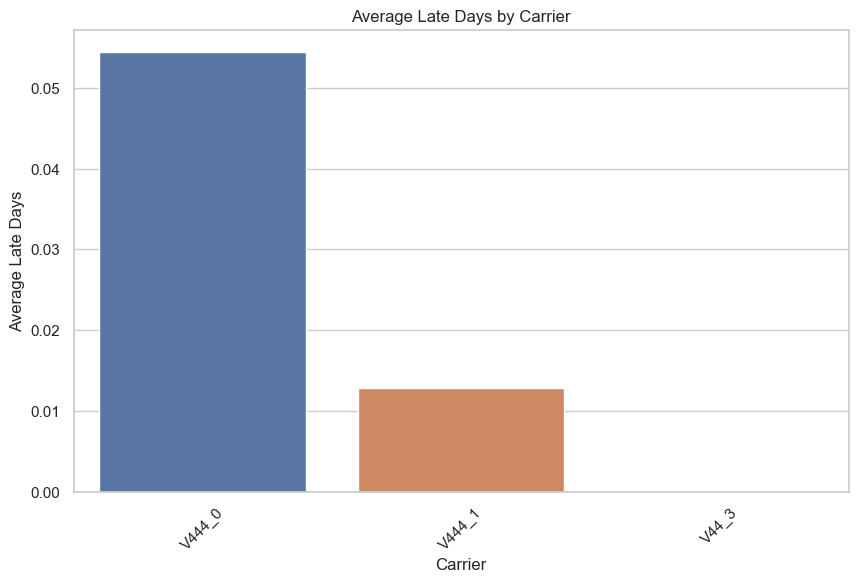

In [15]:
# Average Estimated Shipment Delay per Carrier
average_late_days_by_carrier = Orders.groupby('Carrier')['Ship_Late_Day_count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_late_days_by_carrier.index, y=average_late_days_by_carrier.values)
plt.title('Average Late Days by Carrier')
plt.xticks(rotation=45)
plt.ylabel('Average Late Days')
plt.xlabel('Carrier')
plt.show()

## 2.3 Average Estimated Delay in shipments per service level

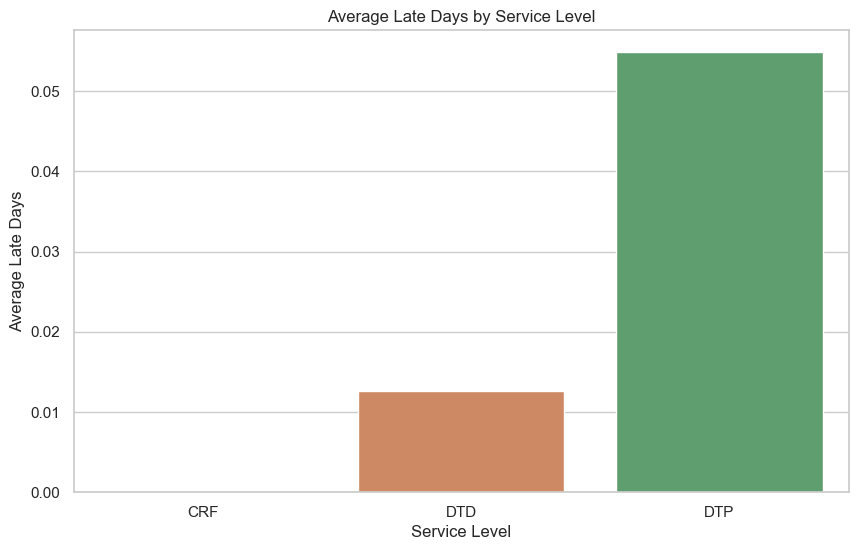

In [19]:
# Average Estimated Delay per Service Level
service_level_performance = Orders.groupby('Service_Level')['Ship_Late_Day_count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=service_level_performance.index, y=service_level_performance.values)
plt.title('Average Late Days by Service Level')
plt.ylabel('Average Late Days')
plt.xlabel('Service Level')
plt.show()

The above analysis shows that highest estimated delays are for the Carrier 'V444_0' and for the service level 'DTP'

# 3. Product Volume distribution per route and per service level

## 3.1 Weight distribution per Route

          Route  Total_Weight
0  PORT04PORT09     430045.58
1  PORT05PORT09        731.19
2  PORT09PORT09     417614.22


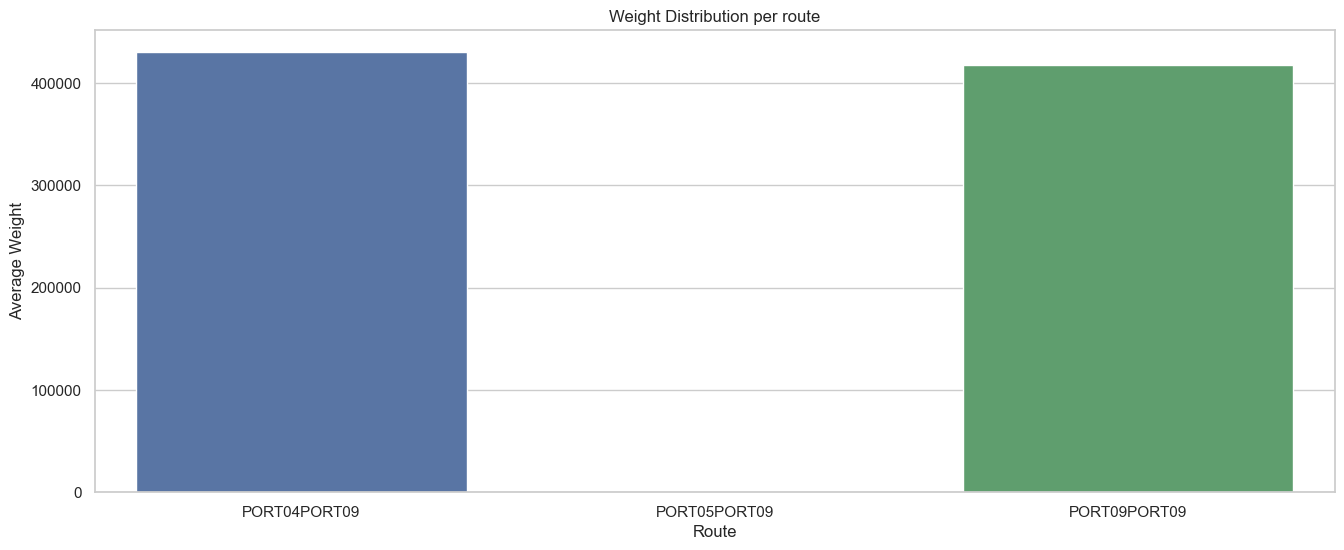

In [17]:
# Define the columns to aggregate
# Group by 'Route' and calculate the average values for the specified columns
route_stats = Orders.groupby(['Route'])['Total_Weight'].agg('mean').reset_index()

# Format the output to two decimal places
route_stats = route_stats.round(2)
# Display the resulting DataFrame
print(route_stats)
# Plotting for Each Route - Average Weight
plt.figure(figsize=(16, 6))
sns.barplot(x='Route', y='Total_Weight', data=route_stats)
plt.title('Weight Distribution per route')
plt.xlabel('Route')
plt.ylabel('Average Weight')
plt.show()

The routes 04-09 and 09-09 are exporting the highest weight of orders

## 3.2 Service Level within a route handling high volumes

          Route Service_Level  Total_Weight
0  PORT04PORT09           CRF     239090.86
1  PORT04PORT09           DTD      40034.45
2  PORT04PORT09           DTP     587247.31
3  PORT05PORT09           CRF        731.19
4  PORT09PORT09           CRF     508131.43
5  PORT09PORT09           DTP      47558.54


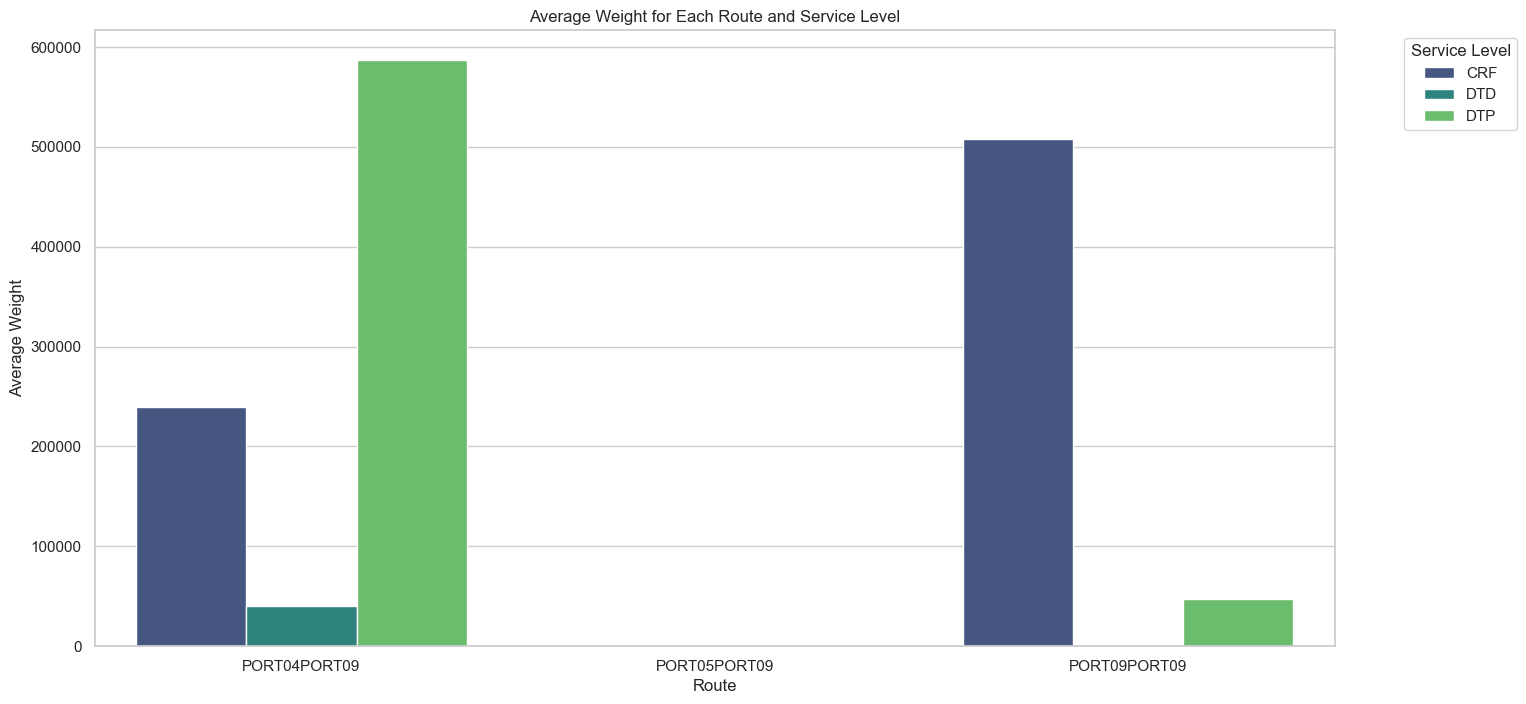

In [20]:
# Group by 'Route' and 'Service_Level' and calculate the average values for the specified columns
route_service_stats = Orders.groupby(['Route','Service_Level'])['Total_Weight'].agg('mean').reset_index()
route_service_stats = route_service_stats.round(2)

# Display the resulting DataFrame
print(route_service_stats)
plt.figure(figsize=(16, 8))
sns.barplot(x='Route', y='Total_Weight', hue='Service_Level', data=route_service_stats, palette='viridis')
plt.title('Average Weight for Each Route and Service Level')
plt.xlabel('Route')
plt.ylabel('Average Weight')
plt.legend(title='Service Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above analysis shows that DTP Service level handles the highest volume in the route between Port 04 and Port 09
In Port09 to Port 09, CRF handles the highest volume of orders

## 3.3 Top 10 products based on shipping volume

In [38]:
# Group by 'Route' and 'Service_Level' and calculate the average values for the specified columns
route_prods_stats = Orders.groupby(['Route','Product_ID'])['Unit_quantity'].agg('sum').reset_index().sort_values(by='Unit_quantity', ascending=False)
top_10_products = route_prods_stats.head(10)
print(top_10_products)


            Route Product_ID  Unit_quantity
380  PORT04PORT09    1684862        3470409
241  PORT04PORT09    1676592        1119252
735  PORT04PORT09    1700569         904493
120  PORT04PORT09    1664051         873011
145  PORT04PORT09    1667927         814076
726  PORT04PORT09    1700140         811381
361  PORT04PORT09    1683560         772283
134  PORT04PORT09    1666524         670437
722  PORT04PORT09    1700130         658352
729  PORT04PORT09    1700143         654556


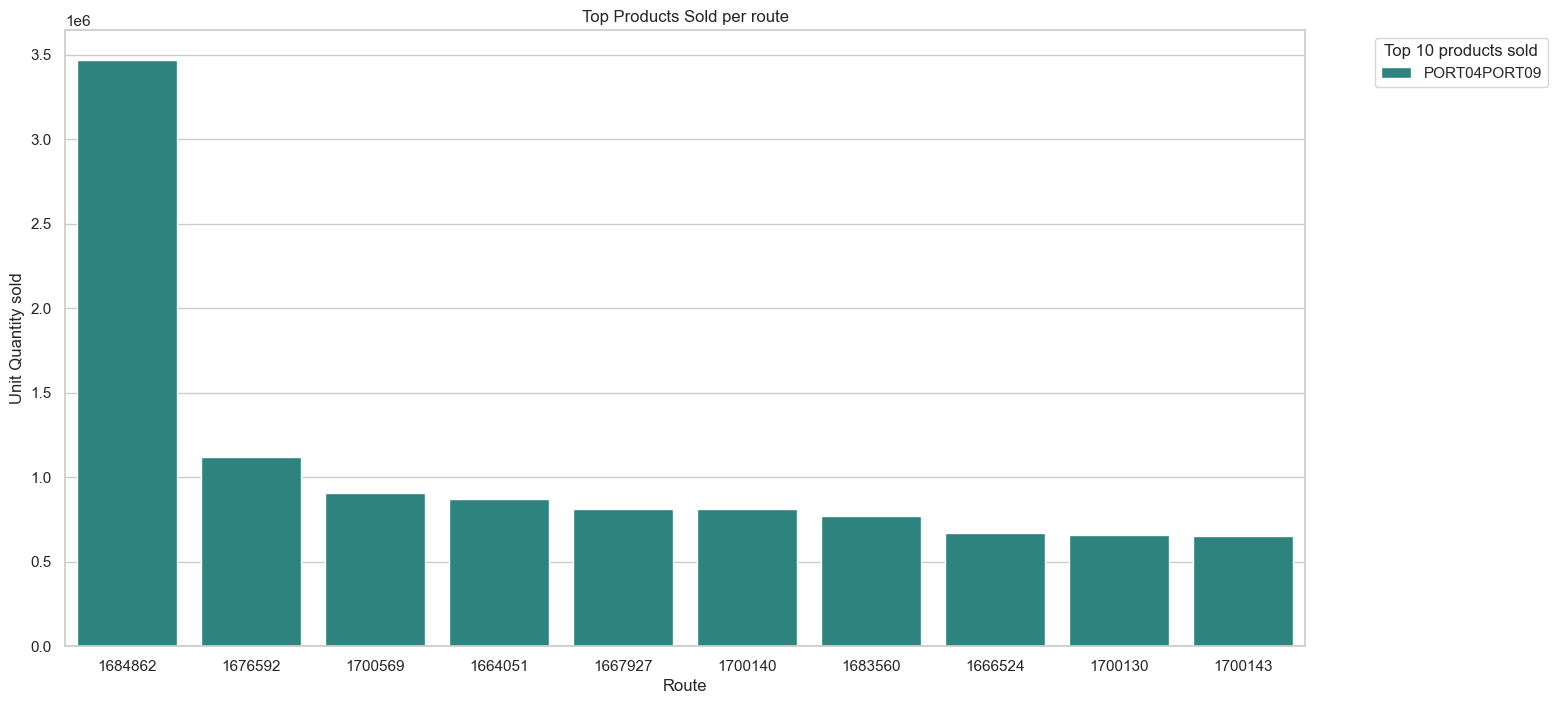

In [42]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Product_ID', y='Unit_quantity',hue='Route',data=top_10_products, palette='viridis')
plt.title('Top Products Sold per route')
plt.xlabel('Route')
plt.ylabel('Unit Quantity sold')
plt.legend(title='Top 10 products sold', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Which carrier transportation option is the most cost effective?

In [20]:
 freight = pd.read_excel('Freight_Rate.xlsx')
freight.head()

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum_cost,rate,mode_dsc,tpt_day_cnt,Carrier_type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0


In [34]:
cost_eff= freight.groupby(['Carrier','mode_dsc'])['rate'].agg('mean').sort_values(ascending=False)
cost=pd.DataFrame(cost_eff)
cost['Percent']=(cost['rate']/cost['rate'].sum()).round(2)*100
cost


,,rate,Percent
Carrier,mode_dsc,,
V444_7,GROUND,128.027200,79.0
V444_5,GROUND,14.634800,9.0
V444_0,GROUND,12.706229,8.0
V444_4,AIR,3.794385,2.0
V444_1,AIR,1.472973,1.0
V444_6,AIR,1.075095,1.0
V444_2,AIR,0.149701,0.0
V444_8,AIR,0.141512,0.0
V444_9,AIR,0.125520,0.0


Text(0.5, 1.0, 'Distribution of Percentages by Carrier')

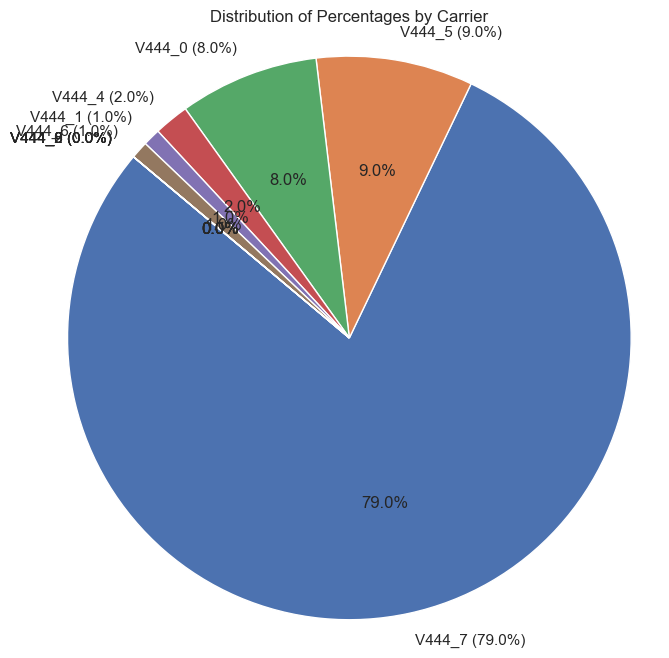

In [37]:
plt.figure(figsize=(8, 8))
percentages=cost['Percent']
carriers = cost.index.get_level_values(0) 
plt.pie(percentages, labels=[f"{carrier} ({percent:.1f}%)" for carrier, percent in zip(carriers, percentages)],
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Title of the pie chart
plt.title('Distribution of Percentages by Carrier')


Based on the Carriers mentioned in the Orders Table, it is seen that Carrier V444_0 is more cost effective for Air travel than by ground travel and V444_1 is cost effective in the Aerial mode of transport

# 5. Which Customers have placed the highest number of Orders?

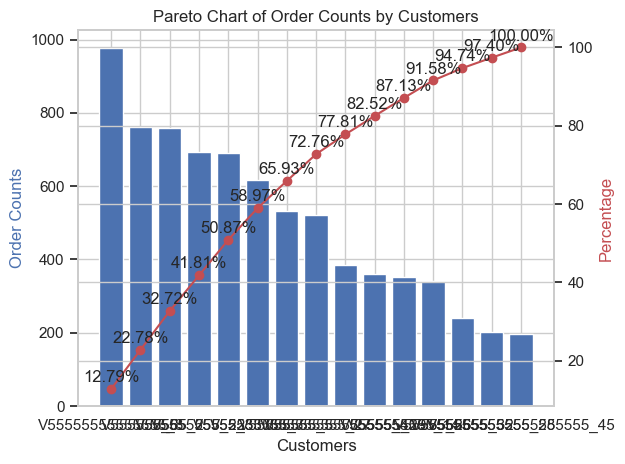

In [60]:
Cust= Orders.groupby('Customer')['Order_ID'].agg('count').sort_values(ascending=False).head(15)
cumulative_counts = Cust.cumsum()
total_orders = Cust.sum()
percentages = (cumulative_counts / total_orders) * 100
fig, ax1 = plt.subplots()

# Plot the bar chart for order counts
ax1.bar(Cust.index, Cust.values, color='b')
ax1.set_xlabel('Customers')
ax1.set_ylabel('Order Counts', color='b')

# Create a secondary y-axis for percentages
ax2 = ax1.twinx()
ax2.plot(Cust.index, percentages, color='r', marker='o')
ax2.set_ylabel('Percentage', color='r')

# Display the percentage values on the right y-axis
for i, txt in enumerate(percentages):
    ax2.annotate(f'{txt:.2f}%', (Cust.index[i], percentages[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Title of the Pareto chart
plt.title('Pareto Chart of Order Counts by Customers')

# Show the Pareto chart
plt.tight_layout()
plt.show()

This shows that 9 out of the top 46 Customers constitute of 80% of the demand within a day